# Examen 1
## Aquino Chapa Martha Abril
Hecho en Python 🐍

In [3]:
#importamos las paqueterías
from pylab import *
import random
from numpy import array
import math

Definimos la función que integrará:

In [4]:
#Definimos la función con la cual podemos obtener la integral de una función
def int1(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[1] - x[0]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de segundo elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primer elemento en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    #la integral en la frontera es
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

In [14]:
x=linspace(0,2*pi,5)
print(int1(x,np.cos(x)))

-12.566370614359172


### 1.En clase vimos como en un arreglo puede representar la gráfica de una función f(x) con los puntos {xi,fi} con i = 1, 2, 3, ..., N. También vimos como obtener las primeras derivadas numéricas en cadapunto, f'(xi) y f''(xi), es decir, podemos obtener el conjunto de puntos {xi, f'i } y {xi, f''i}. Esteproblema consiste en hacer lo mismo pero para el caso de la integral, y para ello realice una función que tenga como entrada los puntos {xi, fi} y que regrese {xi, Fi}, donde Fi representa la integral de la función hasta el xi-ésimo punto. Para corroborar que su función trabaja de manera adecuada, puede utilizar la función cos(x) en el intervalo [0, 2π]. Puede utilizar cualquier algoritmo de integración que vimos en clase o en las tareas.


In [3]:
def fun(x,f):
    h=x[1]-x[0]
    a=min(x)
    F=np.zeros(len(f))
    F[0]=0
    F[1]=(f[1]-f[0])*(x[1]-x[0])
    F[2]=(f[2]-f[0])/(x[2]-x[0])
    F[3]=h*(f[3]-f[0])
    F[-1]=int1(f,x)
    s=np.zeros(len(f))
    s=np.zeros(len(f))
    for i in range (4,len(f)-1):
        s[i]=x[i]
        y=(x[x<=x[i]])
        F[i]=int1(f,y)
    return x,F

# ES ESTA LA DEL EJERCICIO 1

In [166]:
def fun3(x,f):
    #Hacemos un arreglo que llenaremos de los valores de la integral hasta el punto xi
    F=np.zeros(len(f))
    #Para el primer punto la derivada es 0 puesto que no hay área bajo un punto

    #Para una función cuyos primeros dos valores son positivos definimos la integral hasta el primer punto
    if len(f)==1:
        F[0]=0
        
    if len(f)==2:
        F[0]=0
        if f[1]>=0 and f[0]>=0:
            F[1]=(abs(f[1]-f[0]))*(x[1]-x[0])
            
        if f[1]<=0 and f[0]<=0:
            F[1]=-(abs(f[1]-f[0]))*(x[1]-x[0])
            
    if len(f)==3:
        if f[1]>=0 and f[0]>=0:
            F[0]=0
            F[1]=(abs(f[1]-f[0]))*(x[1]-x[0])
            F[2]=(abs(f[2]-f[0]))*(x[2]-x[0])
        if f[1]<=0 and f[0]<=0:
            F[0]=0
            F[1]=-(abs(f[1]-f[0]))*(x[1]-x[0])
            F[2]=-(abs(f[2]-f[0]))*(x[2]-x[0])
    if len(f)==4:
       # if f[1]>=0 and f[0]>=0:
            F[0]=0
            F[1]=(abs(f[1]-f[0]))*(x[1]-x[0])
            F[2]=(abs(f[2]-f[0]))*(x[2]-x[0])
            F[3]=(abs(f[3]-f[0]))*(x[3]-x[0])
            # if f[1]<=0 and f[0]<=0:
        #    F[0]=0
         #   F[1]=-(abs(f[1]-f[0]))*(x[1]-x[0])
          #  F[2]=-(abs(f[2]-f[0]))*(x[2]-x[0])
           # F[3]=-(abs(f[3]-f[0]))*[x[3]-x[0]]

    if len(f)>4:    
        F[0]=0
        F[1]=(abs(f[1]-f[0]))*(x[1]-x[0])
        F[2]=(abs(f[2]-f[0]))*(x[2]-x[0])
        F[3]=(abs(f[3]-f[0]))*(x[3]-x[0])
        
            
        h=x[1]-x[0]
        for i in range (4,len(f)):
            F[i]=0
            #if mod((i),2) == 0:
                #inicio = 2
            #if :
                        #inicio = 1
            if mod((i),2) == 1:
                for j in range(1,i-1,2):
                    F[i] += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                    
            if mod((i),2) == 0:
                p=0
                for j in range(2,i-1,2):
                    p += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                    F[i]=p+(h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
                #    F[i] += 
            
    return F

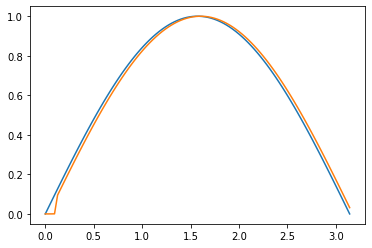

In [167]:
x=linspace(0,pi,100)
m=fun3(x,np.cos(x))
plot(x,np.sin(x))
plot(x,m)
#s=m[:,1]
#print('{:^20}{:^20}'.format(r'x_i','Integral en x_i'))
#for i in range (len(x)):
 #   print('{:^20}{:^20}'.format(x[i],m[i]))

In [10]:
def fun4(x,f):
    #Hacemos un arreglo que llenaremos de los valores de la integral hasta el punto xi
    F=np.zeros(len(f))
    #Para el primer punto la derivada es 0 puesto que no hay área bajo un punto

    #Para una función cuyos primeros dos valores son positivos definimos la integral hasta el primer punto
    #if f[1]>=0 and f[0]>=0:
    F[0]=0
    F[1]=(abs(f[1]-f[0]))*(x[1]-x[0])
    F[2]=(abs(f[2]-f[0]))*(x[2]-x[0])
    F[3]=(abs(f[3]-f[0]))*[x[3]-x[0]]
    #if f[1]<=0 and f[0]<=0:
     #   F[0]=0
      #  F[1]=-(abs(f[1]-f[0]))*(x[1]-x[0])
       # F[2]=-(abs(f[2]-f[0]))*(x[2]-x[0])
        #F[3]=-(abs(f[3]-f[0]))*[x[3]-x[0]]
            
    h=x[1]-x[0]
    for i in range (4,len(f)-1):
        integral=0
        if mod((i),2) == 0:
            inicio = 2
        elif mod((i),2) == 1:
            inicio = 1
    
        for j in range(inicio,i-1,2):
            integral += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
           # return integral
        integral=F[i]
    return F

In [65]:
## Código donde se necesita la integral int1
def fun2(x,f):
    #Hacemos un arreglo que llenaremos de los valores de la integral hasta el punto xi
    F=np.zeros(len(f))
    #Para el primer punto la derivada es 0 puesto que no hay área bajo un punto
    F[0]=0
    #Para una función cuyos primeros dos valores son positivos definimos la integral hasta el primer punto
    if f[1]>=0 and f[0]>=0:
        F[1]=(abs(f[1]-f[0]))*(x[1]-x[0])
    #Para una función cuyas dos imagenes son negativas
    if f[1]<=0 and f[0]<=0:
        F[1]=-(abs(f[1]-f[0]))*(x[1]-x[0])
        
    #habrá que ver que pasa si un punto es negativo y otro positivo:
    #La integral para el último punto es la integral sobre todos los valores    
    F[-1]=int1(f,x)
    s=np.zeros(len(f))
    #Definimos la función para puntos que no sean fronteras y que la función int1 funcione correctamente
    for i in range (2,len(f)-1):
        #Definimos el conjunto de puntos hasta xi
        y=(x[x<x[i]])
        #Definimos la integral hasta el punto xi
        F[i]=int1(f,y)
    return F

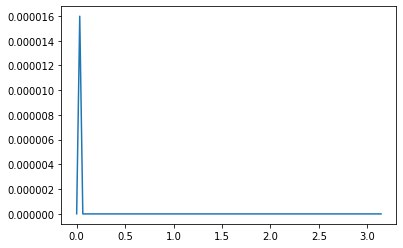

In [67]:
x=linspace(0,pi,100)
m=fun2(x,np.cos(x))
#plot(x,np.sin(x))
plot(x,m)
#s=m[:,1]
#print('{:^20}{:^20}'.format(r'x_i','Integral en x_i'))
#for i in range (len(x)):
 #   print('{:^20}{:^20}'.format(x[i],m[i]))

### 2.

#### a) Haga la gráfica de datos

In [ ]:
from pylab import *
datos = loadtxt ('t_acel.dat' )
ti=datos[:,0]
ai=datos[:,1]


In [ ]:
title("Gráfica de datos"),xlabel("Tiempo"),ylabel('Aceleración'),grid()
plot(datos[:,0],datos[:,1],label='1')

#### b) Calcule la derivada en cada punto utilizando algoritmos que desprecian términos en $h^{3}$ y $h^{5}$. Compare las gráficas de cada uno de los algoritmos y proporcione el error máximo entre los algoritmos utilizados.


Antes de empezar a trabajar con las derivadas, debemos observar si la malla es uniforme:

In [ ]:
#Definimos un arreglo que llenaremos de la diferencia del tiempo entre dos puntos contiguos
malla=np.zeros(len(datos[:,0]))
tiempo=datos[:,0]
#Definimos un ciclo for para obtener las diferencia entre puntos
for i in range (1,len(datos[:,0])):
    malla[i]=tiempo[i]-tiempo[i-1]
#Obtenemos la diferencia entre el espacio más grande entre puntos y el más pequeño
print(max(malla)-min(malla))



Vemos entonces que debido a que el máximo y el mínimo no son iguales, entonces la malla no es uniforme, así que tendremos que trabajar con algoritmos no simétricos.

En la tarea vimos que la derivada de segundo orden está dada por:

$$ f'(x_i)=\frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}$$

Y en los extremos se deben usar las relaciones:

$$f'(x_0)=\frac{-0.5f_2+2f_1-1.5f_0}{x_1-x_0}$$

$$f'(x_0)=-\frac{-0.5f_2+2f_1-1.5f_0}{x_{N}-x_{N-1}}$$

Donde estamos asumiento que nuestro conjuntos de puntos tiene N+1 elementos.

Ahora si, definamos nuestra función para obtener las derivada de orden 2, donde se desprecian términos $h^{3}$.

In [ ]:
def deriv_h3(f,x):
    f_prima = zeros(len(f))
    #h = x[1] - x[0]
    #dosh = 2*h
    #Iniciamos obteniendo la derivada en los puntos que no están en las fronteras
    for i in range(1,len(f)-1):
        f_prima[i] = ( f[i+1]-f[i-1] )/(x[i+1]-x[i-1])
    #Obtenemos la derivada en el primer punto
    f_prima[0] = ( -0.5*f[2] + 2*f[1] -1.5*f[0] )/(x[1]-x[0])
    # calcular el ultimo punto
    f_prima[-1] = -( -0.5*f[-3] + 2*f[-2] -1.5*f[-1] )/(x[-1]-x[-2])    
    return f_prima

In [ ]:
#Graficamos ahora la derivada en cada tiempo, donde f serán las aceleraciónes y x los tiempos
title("Derivada de orden 2"),xlabel("Tiempo"),ylabel('Derivada de la aceleración'),grid()
plot(datos[:,0],deriv_h3(datos[:,1],datos[:,0]))

Ahora, para la derivada de orden 4 donde se desprecian términos $h^{5}$ se tiene que está está dada por:

#### b) Calcule la derivada en cada punto utilizando algoritmos que desprecian términos en $h^{3}$ y $h^{5}$. Compare las gráficas de cada uno de los algoritmos y proporcione el error máximo entre los algoritmos utilizados.

En clase se obtuvo que la integral que despreciaba términos del orden de $h^{3}$ está dada por el algoritmo:
$$\int_{x_i-h}^{x_i+h}f(x)dx=h\frac{f_{i+1}+4f_i+f_{i-1}}{3}$$

Donde el valor de la integral en la fronta derecha está dada por:
$$\int_{x_0}^{x_0+h}f(x)dx=\frac{h}{48}(23f_{0}+26f_{1}-4f_{2}+6f_{3}-3f_{4})$$

En clase vimos que este algoritmo está dado por la función int_algo2.

In [ ]:
#Definimos la función int_alg2
def int_alg2(x,y):
    integral = 0
    h = x[1] - x[0]
    if mod(len(y),2) == 0:
        inicio = 2
    elif mod(len(y),2) == 1:
        inicio = 1
    for i in range(inicio,len(y)-1,2):
        integral += y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(y),2) == 0:
        integral += (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral

In [ ]:
#Obtenemos el valor de la integral:
print('La integral despreciando valor de h^{3} es:',int_alg2(ti,ai))

De clase, sabemos que la integral de Simpson desprecia términos del orden $h^{5}$.
Cuyo algoritmo está dado por:
$$\int_{x_i}^{x_i+3}=\frac{3h}{8}\left(  f(x_i)+3f(x_{i+1})+3f(x_{i+2})+f(x_{i+3})\right)+\mathcal{O}(h^{5})$$


In [ ]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla,menos el primer punto, en la cual vamos a integrar es divisible entre 3, pedimos que saque la integral a partir de primer elemento
    if mod(len(f)-1,3) == 0:
        inicio = 0
    #Si la malla,menos el primer punto,el residuo de dividir entre 3 es 1, pedimos que saque la integral del a partir del segundo elemento   
    if mod(len(f)-1,3) == 1:
        inicio = 1
    #Si la malla,menos el primer punto,el residuo de dividir entre 3 es 2, pedimos que saque la integral del a partir del tercer elemento       
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]+3*f[i+1]+3*f[i+2]+f[i+3]
    integral = integral*(3*h/8)
    
    # Si nos sobran tres puntos, podemos usar el algoritmo del ejercicio 1.
    if mod(len(f)-1,3) == 2:
        integral += (f[0] + 4*f[1] + f[2])*(h/3)
        
    #Si solo tenemos dos puntos en la frontera, le sumamos el siguiente valor a la integral 
    if mod(len(f)-1,3) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

In [ ]:
#Obtenemos el valor de la integral:
print('La integral despreciando términos h^5 es',intSimpson(ai,ti))

#### c) Calcule la integral total de los datos con el algoritmo int_alg2 que viene en el NB 6 de la página del curso y compare el resultado utilizando el algoritmo de Boole. ¿Cuál es la diferencia numérica entre ambos algoritmos?

La integral de Boole está dada por:
$$\int_{x_i}^{x_{i+4}}f(x)={\frac{2h}{48}}(7f(x_i)+32f(x_{i+1})+12f(x_{i+2})+32f(x_{i+3})+7f(x_{i+4}))+\mathcal{O}(h^{7}) $$

In [ ]:
#Definimos la función que nos calcule la integral de Boole
def intBoole(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla, menos un punto, en la cual vamos a integrar es divisible entre 4, pedimos que saque la integral del a partir del primer elemento
    if mod(len(f)-1,4) == 0:
        inicio = 0
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4 es 1, pedimos que saque la integral del a partir del segundo elemento de la malla
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4, es 2, pedimos que saque la integral del a partir del tercer elemento de la malla
    if mod(len(f)-1,4) == 2:
        inicio = 2
        
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4, es 3 pedimos que saque la integral del a partir del cuarto elemento de la malla
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 4 puntos
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]+32*f[i+1]+12*f[i+2]+32*f[i+3]+7*f[i+4]
    integral = integral*(2*h/45)
    #Definimos la integral correspondiente a los puntos frontera para sumarlos a la integral total.
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]+3*f[i+1]+3*f[i+2]+f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0] + 4*f[1] + f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
        #integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

In [ ]:
#Obtenemos el valor de la integral:
Boole=intBoole(ai,ti)
algo_2=int_alg2(ti,ai)
diferencia=abs(Boole-algo_2)
print('La diferencia la integral con el algoritmo de Boole e int_algo2 es:',diferencia)

#### d) Calcule la integral de los datos, es decir, un conjunto de puntos {ti, vi} tales que su derivada numérica sean los puntos {ti,ai} proporcionados por el archivo

Para este ejercicio podemos apreciar que podemos usar en el ejercicio 1.

In [ ]:
ai=datos[:,1]
ti=datos[:,0]
vi=fun2(ti,ai)
#s=m[:,1]
print('{:^20}{:^20}'.format(r't_i','v_i'))
#for i in range (len(ai)):
    #está comentado para ahorrar espacio
  #  print('{:^20}{:^20}'.format(ti[i],vi[i]))

### 3. Sabemos que $\int_{1}^{\infty}{\frac{dx}{x^{2}}}$, sin embargo numéricamente no es factible utilizar el infinito. De esta manera genere una forma de calcular dicha integral hasta obtener una precisión de 10−3. Explique su procedimiento de tal manera que pueda garantizar el resultado de dicha integral y cual sería su generalización.

In [ ]:
#Le damos un valor inicial al espacio donde evaluaremos nuestra integral (1,i,100)
i=1
#El orden del mayor error que deseamos obtener
error=0.001
#print(abs(1-int1(x**(-2),x)))
#La malla donde evaluaremos al integra
x=linspace(1,i,100)
#El ciclo que nos irá aumentando el intervalo de integración, el cual se cumplirá mientrar el error de la malla (a,i,n) sea mayor al error
while (abs(1-int1(x**(-2),x)))>=error:
#Iremos aumentando de un punto a nuestra malla
    i +=1
#Definimos nuestro nuevo espacio i
    x=linspace(1,i,100)
#Si el error de la integral es menor al propuesto le pedimos al que nos imprima el número i
if  (abs(1-int1(x**(-2),x)))<=error:
    print(i)

In [ ]:
#Hacemos nuestra malla con la i obtenida en la celda anterior
x=linspace(1,i,100)
print("La integral es: ",int1(x**(-2),x))
print('El error de la integral es: ',abs(1-int1(x**(-2),x)))

In [ ]:
#Le damos un valor inicial al espacio donde evaluaremos nuestra integral (1,i,100)
i=1
#El orden del mayor error que deseamos obtener
error=0.001
#print(abs(1-int1(x**(-2),x)))
#La malla donde evaluaremos al integra
x=linspace(1,i,100)
#El ciclo que nos irá aumentando el intervalo de integración, el cual se cumplirá mientrar el error de la malla (a,i,n) sea mayor al error
while (abs(1-int1(x**(-2),x)))>=error:
#Iremos aumentando de un punto a nuestra malla
    i +=1
#Definimos nuestro nuevo espacio i
    x=(linspace(1,i,100))/(linspace(1,i,100))
#Si el error de la integral es menor al propuesto le pedimos al que nos imprima el número i
if  (abs(1-int1(x**(-2),x)))<=error:
    print(i)